## Final Project Submission

* Student name: Dan Tong
* Student pace: self paced / part time 
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:

***

# King County Housing Analysis

## Overview
The objective of this project is to analyze King County housing data to provide insight on price drivers and market trends on houses. I will be making recommendations to a real estate agency on what features of a home best predict sale price. To do this, I will be building a linear regression model to analyze and predict key features to maximize the sale price of a house.

## Data Understanding

The dataset being used in this analysis contains housing sale data from King County, Washington. 
#### Names and Descriptions of the Kings County Dataset Features
- id - Unique identifier for a house
- date - Date house was sold
- price - Sale price (prediction target)
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - Square footage of living space in the home
- sqft_lot - Square footage of the lot
- floors - Number of floors (levels) in house
- waterfront - Whether the house is on a waterfront
- view - Quality of view from house
- grade - Overall grade of the house. Related to the construction and design of the house.
- sqft_above - Square footage of house apart from basement
- sqft_basement - Square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - ZIP Code used by the United States Postal Service
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data
df = pd.read_csv('data/kc_house_data.csv')

#dropping irrelevent features
df = df.drop(columns=['date','id','sqft_lot15','waterfront','lat','long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,1340
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,1690
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,2720
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,1360
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,1800


In [3]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 2.5+ MB


price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
dtype: int64

Here, we see that the dataset is primarily comprised of numerical values, however there are variables that have the "object" dtype. These may be able to be used as categorical data or may be problematic.
- view
- condition
- grade
- sqft_basment

There are also variables that contain null values.
- view
- yr_renovated

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,1986.620318
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,685.230472
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000


By examining some of the descriptive information of the dataframe, I noticed a few issues that I will need to address:

One problem is an outlier with "bedrooms." There is a max of 33 bedrooms but a min of 1, mean of 3.37 and median of 4.

Another issue is with "yr_renovated." Some houses, actually most houses, in this dataset have never been renovated.

In [5]:
#examining the outlier
df.loc[(df['bedrooms']) == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
15856,640000.0,33,1.75,1620,6000,1.0,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,1330


## Data Cleaning - Dealing with Null Values
The first step that I will be taking is dealing with the null values in the "view" and "yr_renovated" columns.
#### View
There are only 63 null values in the 'view' feature. We can safely remove those without it significantly affecting the dataset.

In [6]:
df = df.dropna(subset=['view'])

#### Year Renovated
When examining the 'yr_renovated' feature, I noticed that the large majority of houses in the dataset were never renovated. 

When inspecting the null values further, there doesn't seem to be much in common among the entries. The mins, max, and means seem to be quite similar with the rest of the dataset.

Because of this information, I believe it's safe to operate under the assumption that the houses missing data were never renovated.

In [7]:
#Examining the frequency in the 'yr_renovated' column
df['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [8]:
#examining rows with null values in 'yr_renovated'
df[df['yr_renovated'].isnull()].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,2720
12,310000.0,3,1.00,1430,19901,1.5,NONE,Good,7 Average,1430,0.0,1927,NaN,98028,1780
23,252700.0,2,1.50,1070,9643,1.0,NONE,Average,7 Average,1070,0.0,1985,NaN,98030,1220
26,937000.0,3,1.75,2450,2691,2.0,NONE,Average,8 Good,1750,700.0,1915,NaN,98119,1760
28,438000.0,3,1.75,1520,6380,1.0,NONE,Average,7 Average,790,730.0,1948,NaN,98115,1520


In [9]:
df[df['yr_renovated'].isnull()].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,3.830000e+03,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,0.0,3830.000000,3830.000000
mean,5.386206e+05,3.349347,2.093668,2061.622977,14269.193995,1.485770,1774.670235,1970.478851,NaN,98078.802350,1971.087990
std,3.586959e+05,0.895795,0.775070,920.888937,38080.232022,0.545519,833.223259,29.482805,NaN,53.595847,686.966541
min,7.800000e+04,1.000000,0.500000,500.000000,635.000000,1.000000,490.000000,1900.000000,NaN,98001.000000,460.000000
25%,3.229760e+05,3.000000,1.500000,1410.000000,5040.000000,1.000000,1180.000000,1950.000000,NaN,98033.000000,1470.000000
50%,4.500000e+05,3.000000,2.250000,1894.500000,7667.000000,1.000000,1540.000000,1974.000000,NaN,98070.000000,1820.000000
75%,6.430000e+05,4.000000,2.500000,2530.000000,10706.000000,2.000000,2190.000000,1996.000000,NaN,98118.000000,2320.000000
max,5.570000e+06,8.000000,6.750000,9200.000000,881654.000000,3.500000,8020.000000,2015.000000,NaN,98199.000000,5790.000000


In [10]:
#replacing null values in 'yr_renovated'
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
dtype: int64

## Data Cleaning - Dealing with Objects


In [11]:
#Examining 'view'
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### View
View is an ordinal variable so I'm changing the values from strings to integers

In [12]:
#transforming 'view' into a 1-5 scale
view_map = {'NONE':1, 'FAIR':2, 'AVERAGE':3, 'GOOD':4, 'EXCELLENT':5}
df =df.replace({'view':view_map})

### Condition
Like 'view', 'condition' is also an ordinal variable, so I will also be converting these ratings into a numerical value.

In [13]:
#Examining 'condition'
df['condition'].value_counts()

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64

In [14]:
#transforming 'condition' into a 1-5 scale
condition_name = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
condition_value =  ['1', '2', '3', '4', '5']

df['condition'] = df['condition'].replace(condition_name, condition_value).astype(int)

In [15]:
#Examining 'grade'
df['grade'].value_counts()

7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### Grade
The 'grade' feature has a score and rating, so I will just adjust the values to just be the numerical value.

In [16]:
#replacing everything after the number
df['grade'] = df['grade'].str.replace(r"\D", '').astype(int)
df['grade'].value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [17]:
#Examining 'sqft_basement'
df['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 302, dtype: int64

### Square Foot Basement
Now, we notice why 'sqft_basement' is an object instead of a number value like the other sqft features. 

There are 452 entries with a '?' and this is essentially the same as a null value, so let's examine it.

In [18]:
df[df['sqft_basement'] == '?'].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
6,257500.0,3,2.25,1715,6819,2.0,1,3,7,1715,?,1995,0.0,98003,2238
18,189000.0,2,1.00,1200,9850,1.0,1,4,7,1200,?,1921,0.0,98002,1060
42,861990.0,5,2.75,3595,5639,2.0,1,3,9,3595,?,2014,0.0,98053,3625
79,720000.0,4,2.50,3450,39683,2.0,1,3,10,3450,?,2002,0.0,98010,3350
112,272500.0,3,1.75,1540,12600,1.0,1,4,7,1160,?,1980,0.0,98038,1540


In [19]:
df[df['sqft_basement'] == '?'].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
count,4.520000e+02,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,5.312318e+05,3.402655,2.106195,2055.00885,15697.327434,1.517699,1.258850,3.404867,7.643805,1767.920354,1970.019912,92.530973,98081.694690,1957.500000
std,3.334266e+05,0.990774,0.790608,898.76675,50138.367353,0.559851,0.794542,0.654016,1.123872,798.726174,31.766150,419.681990,52.384682,665.180767
min,1.025000e+05,1.000000,0.500000,600.00000,681.000000,1.000000,1.000000,1.000000,5.000000,600.000000,1900.000000,0.000000,98001.000000,740.000000
25%,3.222500e+05,3.000000,1.500000,1430.00000,5000.000000,1.000000,1.000000,3.000000,7.000000,1167.500000,1944.750000,0.000000,98033.000000,1490.000000
50%,4.595000e+05,3.000000,2.250000,1910.00000,7199.500000,1.500000,1.000000,3.000000,7.000000,1595.000000,1975.000000,0.000000,98074.000000,1800.000000
75%,6.500000e+05,4.000000,2.500000,2525.00000,10443.000000,2.000000,1.000000,4.000000,8.000000,2180.000000,1999.250000,0.000000,98118.250000,2342.500000
max,3.420000e+06,7.000000,5.500000,6930.00000,881654.000000,3.000000,5.000000,5.000000,11.000000,5450.000000,2015.000000,2014.000000,98199.000000,4560.000000


I see that the data is fairly consistent with the rest of the dataset. I also see that the majority of houses in this dataset do not have basements, so I think we can apply the same logic that was used when addressing the missing values in the 'yr_renovated' feature.

In [20]:
#replacing '?' values in 'sqft_basement' and converting it from an object datatype
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   view           21534 non-null  int64  
 7   condition      21534 non-null  int32  
 8   grade          21534 non-null  int32  
 9   sqft_above     21534 non-null  int64  
 10  sqft_basement  21534 non-null  float64
 11  yr_built       21534 non-null  int64  
 12  yr_renovated   21534 non-null  float64
 13  zipcode        21534 non-null  int64  
 14  sqft_living15  21534 non-null  int64  
dtypes: float64(5), int32(2), int64(8)
memory usage: 2.5 MB


## Data Visualization

### Histograms For the Variables
Now that I cleaned the dataset, I'm plotting the features to examine normality. Many features are skewed so I will be normalizing them by using log transformation. 

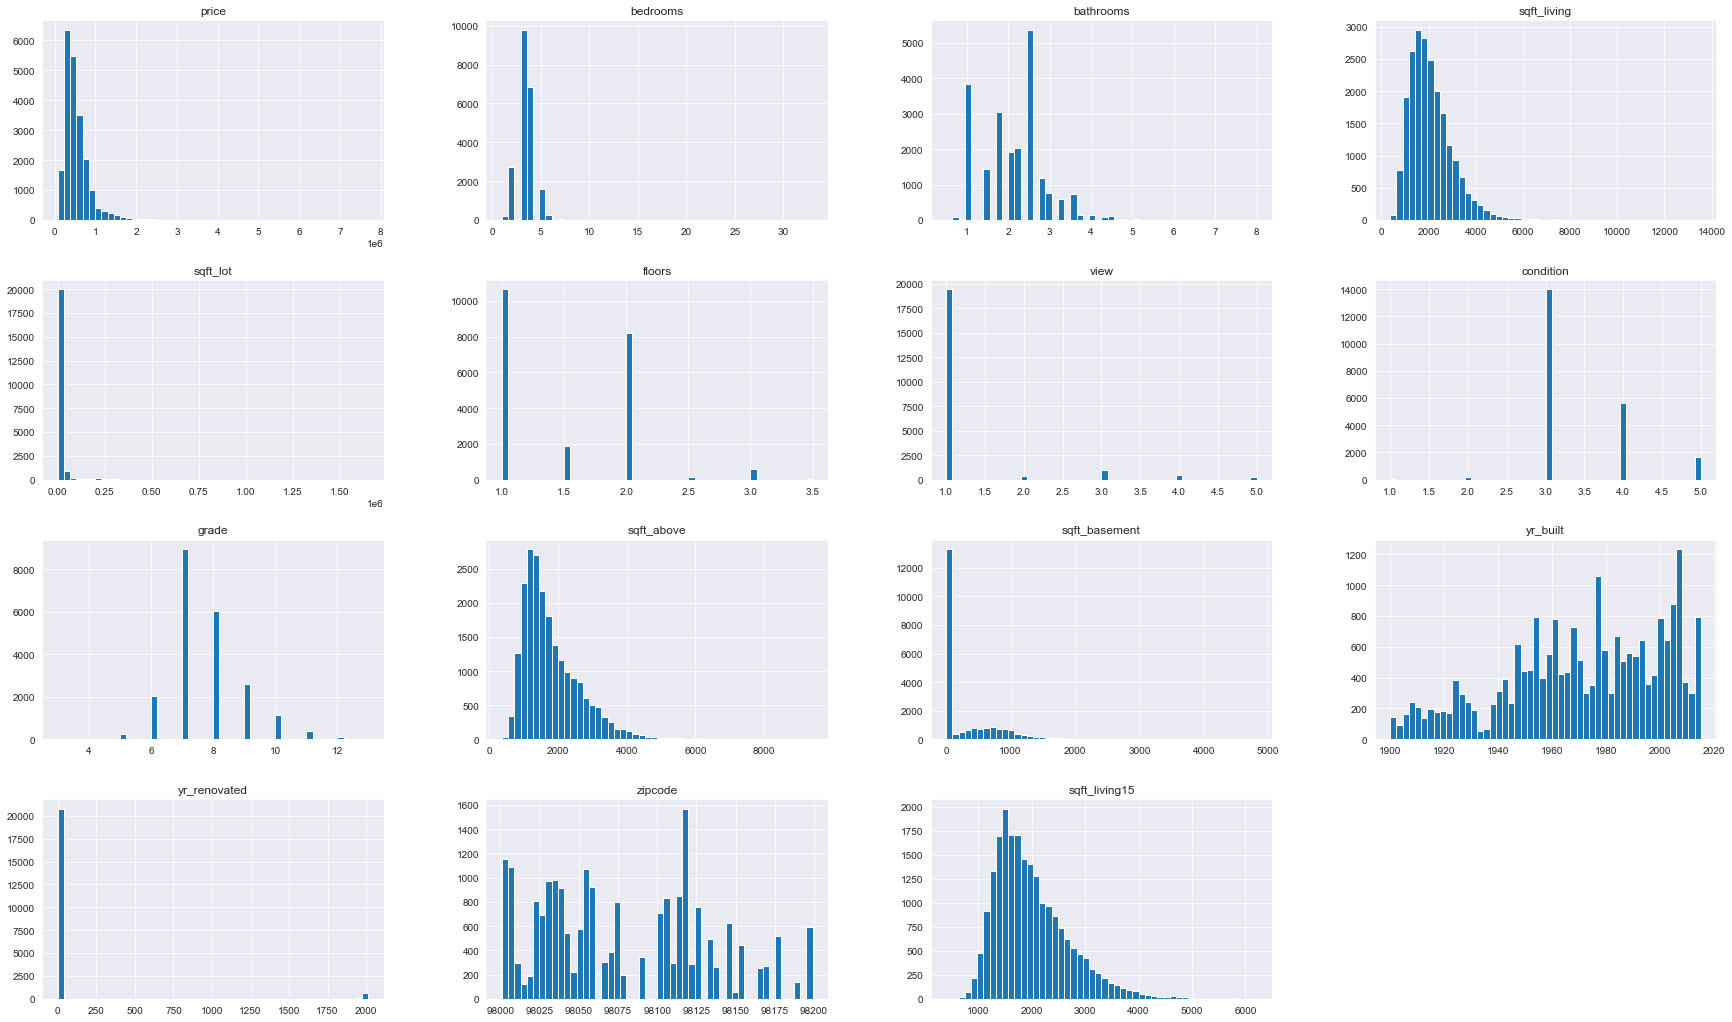

In [21]:
sns.set_style('darkgrid')

#checking normality
df.hist(bins=50, figsize=(30,18));

### Multicollinearity of Predictor Variables
Next, I investigated how the features correlate with one another.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.395734,0.035393,0.668307,0.605695,0.319082,0.054273,0.117982,-0.053620,0.585304
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.078523,0.026402,0.356095,0.479148,0.296548,0.155462,0.017797,-0.153990,0.392874
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.186451,-0.126682,0.665312,0.686173,0.277583,0.507565,0.046955,-0.204435,0.569139
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.282532,-0.059783,0.762398,0.876553,0.427422,0.318217,0.050871,-0.199839,0.756208
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.075298,-0.008375,0.115122,0.184325,0.015097,0.052646,0.005091,-0.129846,0.145142
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.028436,-0.264138,0.458694,0.523367,-0.242348,0.489410,0.003317,-0.058966,0.279176
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.090324,0.085277,0.279561
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.045735,1.000000,-0.147326,-0.158830,0.167889,-0.361398,-0.055730,0.002125,-0.093172
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.249727,-0.147326,1.000000,0.755977,0.164272,0.448255,0.015235,-0.185710,0.713462
sqft_above,0.605695,0.479148,0.686173,0.876553,0.184325,0.523367,0.166299,-0.158830,0.755977,1.000000,-0.052292,0.423999,0.020216,-0.261480,0.731543


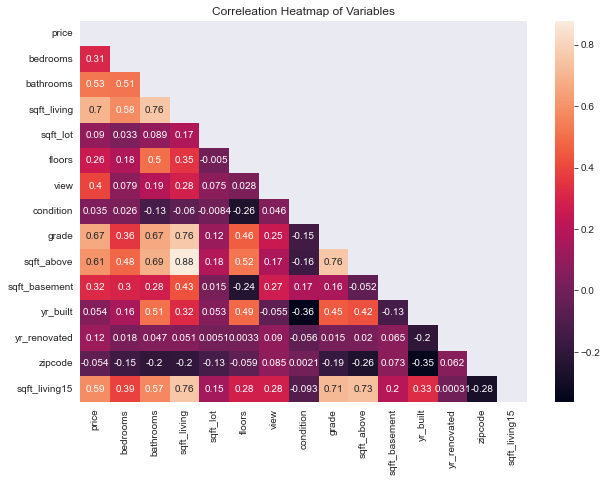

In [22]:
#making price the target variable
X = df.drop('price', axis=1)
y = df['price']

#heatmap to show multicollinearity
heatmap_df = pd.concat([y, X], axis=1)
corr = heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,7))

sns.heatmap(
    data = corr,
    mask = np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correleation Heatmap of Variables');

df.corr()

### Heatmap
From the heatmap, we see a few things:
- 'sqft_living' has the highest correlation with price with an r-value of 0.7
    - 'grade' at 0.67, 'sqft_above' at 0.61, 'sqft_living15' at 0.59
- However, 'sqft_living' also has strong correlation with other features like 'bedrooms' (0.58), 'bathrooms' (0.76), 'sqft_above' (0.88), 'sqft_living15' (0.76).

'sqft_above', 'sqft_living15', and 'sqft_living' may all be too closely related. It may be best to choose one when constructing the model.

'zipcode' and 'condition' have low correlations with 'price' so it may not be useful for the model.

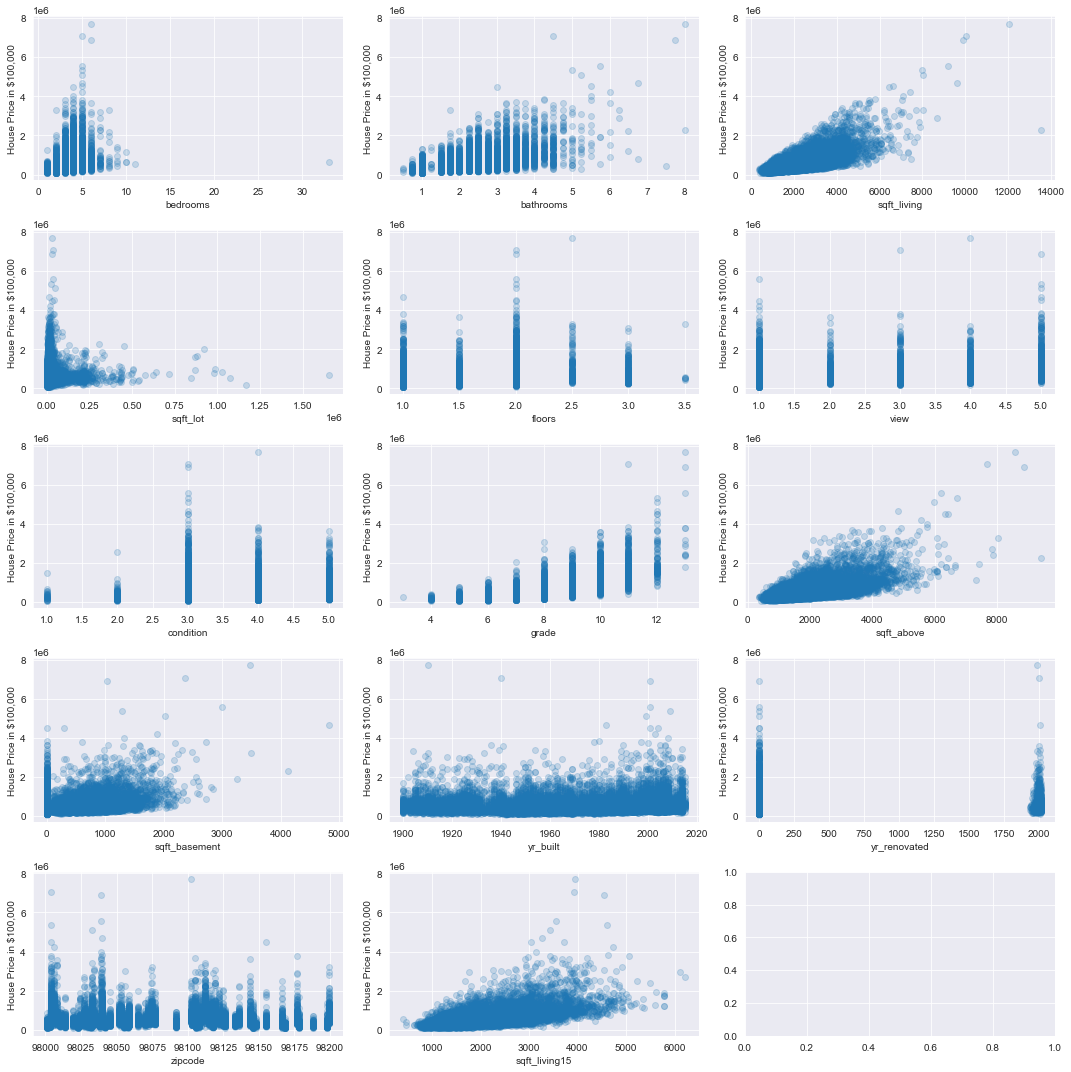

In [23]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(15,15))
fig.set_tight_layout(True)

for ind, col in enumerate(X.columns):
    ax = axes[ind//3][ind%3]
    ax.scatter(X[col], y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("House Price in $100,000");

As indicated by the heatmap, 'grade' clearly has a strong correlation with price. 'sqft_living' has the strongest correlation of the square foot features, so I think both of these would be strong predictors.

### Creating a Linear Model around 'sqft_living' and 'price'

In [24]:
#initialize model
regression_model = linear_model.LinearRegression()

#train the model
regression_model.fit(X=pd.DataFrame(df['sqft_living']), y=df['price'])

#check the model y-intercept and coefficient and score
print('y-intercept: ', regression_model.intercept_)
print('coefficient: ', regression_model.coef_)
print('R-Squared:   ', regression_model.score(X=pd.DataFrame(df['sqft_living']), y=df['price']))

y-intercept:  -42152.94680562895
coefficient:  [279.93211535]
R-Squared:    0.4922247077876327


In [25]:
prediction = regression_model.predict(X=pd.DataFrame(df['sqft_living']))

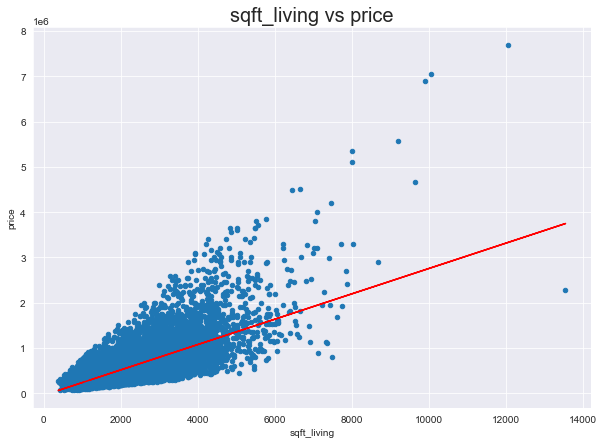

In [26]:
#plotting 'sqft_living' and 'price'
df.plot(kind='scatter', x='sqft_living', y='price', figsize=(10,7))

#best fit line from regression
plt.plot(df['sqft_living'], prediction, color='red')
plt.title("sqft_living vs price", fontsize=20);

In [27]:
outcome = 'price'

x_col = ['sqft_living']

predictors = '+'.join(x_col)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:46   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

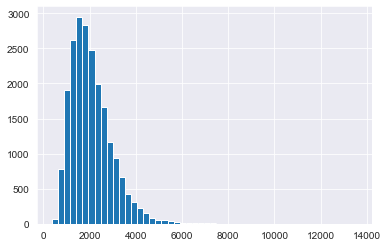

In [28]:
df['sqft_living'].hist(bins=50)

<AxesSubplot:>

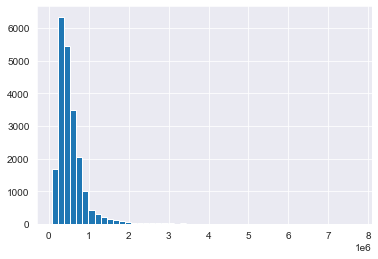

In [29]:
df['price'].hist(bins=50)

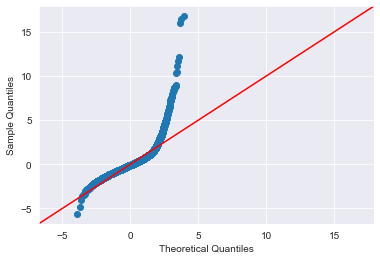

In [30]:
f = 'price~sqft_living'

model = ols(formula=f, data=df).fit()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

We can see that the data in 'sqft_living' and 'price' is a bit skewed and the residuals also show that it's not very normal. I will normalize them with log.

### Creating a Linear Model around 'grade' and 'price'

In [31]:
#initialize model
regression_model = linear_model.LinearRegression()

#train the model
regression_model.fit(X=pd.DataFrame(df['grade']), y=df['price'])

#check the model y-intercept and coefficient and score
print('y-intercept: ', regression_model.intercept_)
print('coefficient: ', regression_model.coef_)
print('R-Squared:   ', regression_model.score(X=pd.DataFrame(df['grade']), y=df['price']))

y-intercept:  -1057457.7549521732
coefficient:  [208623.04513866]
R-Squared:    0.4466345780587908


In [32]:
prediction = regression_model.predict(X=pd.DataFrame(df['grade']))

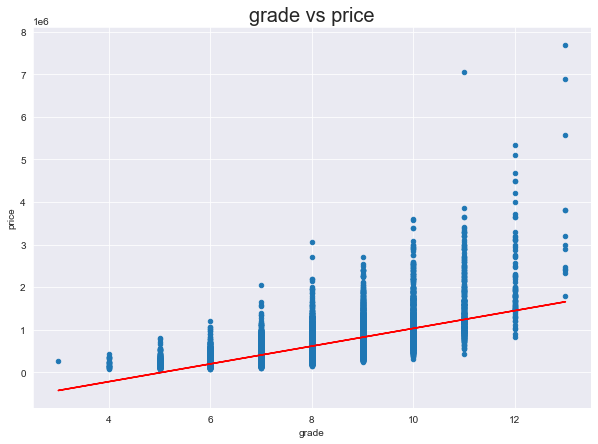

In [33]:
#plotting 'sqft_living' and 'price'
df.plot(kind='scatter', x='grade', y='price', figsize=(10,7))

#best fit line from regression
plt.plot(df['grade'], prediction, color='red')
plt.title("grade vs price", fontsize=20);

<AxesSubplot:>

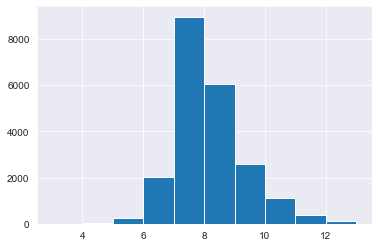

In [34]:
df.grade.hist()

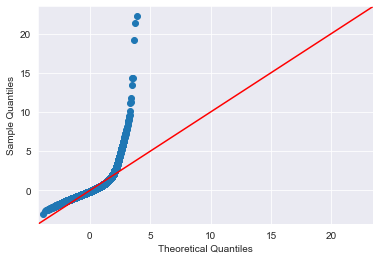

In [35]:
f = 'price~grade'

model = ols(formula=f, data=df).fit()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

'grade' looks fairly normal on the histogram but when we plot the residuals, we see that it's not the case so I will need to transform the data.

### Normalizing features with 'log'

In [36]:
#normalizing 'price', 'sqft_living', and 'grade' with log
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])
df['grade'] = np.log(df['grade'])

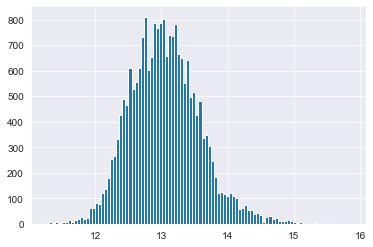

In [37]:
df.price.hist(bins=100);

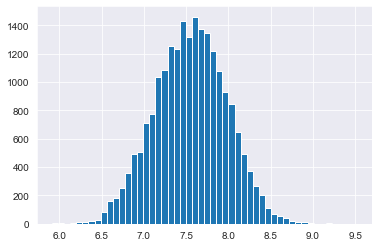

In [38]:
df.sqft_living.hist(bins=50);

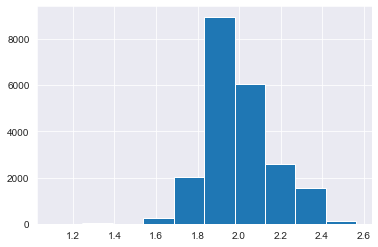

In [39]:
df.grade.hist();

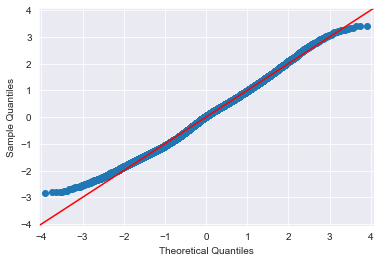

In [40]:
#checking the residuals after log transformation, revealing a pretty normal distribution
f = 'price~sqft_living'

model = ols(formula=f, data=df).fit()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### Baseline Model
Using the now normalized 'sqft_living' and the normalized 'price', I created my baseline model. 

It revealed an R-squared value of 0.455, which means I need to add more features to improve my model's goodness.

The p-value is smaller than 0.05, which means there's a linear relationship between 'sqft_living' and 'price'.

In [41]:
outcome = 'price'

x_col = ['sqft_living']

predictors = '+'.join(x_col)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.798e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:47   Log-Likelihood:                -10197.
No. Observations:               21534   AIC:                         2.040e+04
Df Residuals:                   21532   BIC:                         2.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7280      0.047    142.521      0.000       6.635       6.821
sqft_living     0.8370      0.006    134.090      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.987   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.276
Skew:                           0.143   Prob(JB):                     1.53e-25
Kurtosis:                       2.786   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Improving the model with 'grade'
'sqft_living' and 'grade' improved the r-squared value from 0.492 to 0.537.

In [42]:
#adding log normalized 'grade' to my model
x_cols = ['sqft_living', 'grade']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:47   Log-Likelihood:                -8434.2
No. Observations:               21534   AIC:                         1.687e+04
Df Residuals:                   21531   BIC:                         1.690e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6571      0.044    152.990      0.000       6.572       6.742
sqft_living     0.4406      0.009     51.176      0.000       0.424       0.457
grade           1.5136      0.024     61.879      0.000       1.466       1.562
==============================================================================
Omnibus:                      133.373   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.780
Skew:                           0.194   Prob(JB):                     3.28e-30
Kurtosis:                       2.980   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

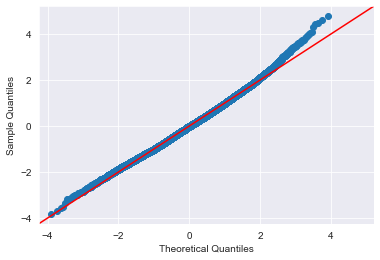

In [43]:
f = 'price~grade'

model = ols(formula=f, data=df).fit()
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### Bathrooms
Adding 'bathrooms' didn't improve our R-Squared much. This may be because of it's strong correlation with 'sqft_living'. Since there's such a strong overlap, I will be leaving it out of my next model.

In [44]:
#normalizing 'view' with log transformation
df['bathrooms'] = np.log(df['bathrooms'])

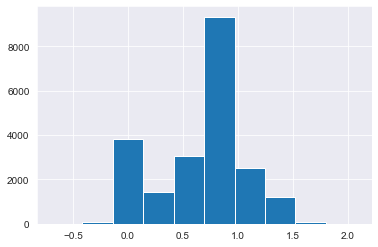

In [45]:
df['bathrooms'].hist();

In [46]:
#adding 'bathrooms' to my model
x_cols = ['sqft_living', 'grade', 'bathrooms']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     8419.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:48   Log-Likelihood:                -8376.0
No. Observations:               21534   AIC:                         1.676e+04
Df Residuals:                   21530   BIC:                         1.679e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.1656      0.063     98.045      0.000       6.042       6.289
sqft_living     0.5002      0.010     49.012      0.000       0.480       0.520
grade           1.5695      0.025     62.936      0.000       1.521       1.618
bathrooms      -0.1055      0.010    -10.801      0.000      -0.125      -0.086
==============================================================================
Omnibus:                      106.851   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.372
Skew:                           0.174   Prob(JB):                     2.93e-24
Kurtosis:                       3.000   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Zip Code
Looking back at the heatmap, 'zipcode' has a very weak correlation with 'price.' This made me think about the feature. 'zipcode' has number values however they represent a location and are a categorical feature.

Intuitively, I think location has an impact on housing price, but the way the feature is now doesn't properly represent location. Because of this, I OneHotEncoded the feature. 

In [47]:
df['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [48]:
#zipcode OHE
dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first=True)

#creating a list of columns to drop keeping only zipcode, sqft_living, and grade
keep_list = ['price', 'zipcode', 'sqft_living', 'grade']
irrelevant_cols = set(list(df.columns)) - set(list(keep_list))

#updating df to only have the features I intend to use
df = df.drop(irrelevant_cols, axis=1)

#adding the zipcode dummy variables and removing the original zipcode column
preprocessed_df = pd.concat([df, dummies], axis=1)
preprocessed_df = preprocessed_df.drop('zipcode', axis=1)

In [49]:
X = preprocessed_df.drop('price', axis=1)
y = preprocessed_df['price']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:48   Log-Likelihood:                 2929.6
No. Observations:               21534   AIC:                            -5715.
Df Residuals:                   21462   BIC:                            -5141.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8052      0.031    222.589      0.000       6.745       6.865
sqft_living     0.5356      0.005    101.571      0.000       0.525       0.546
grade           0.8449      0.015     54.982      0.000       0.815       0.875
zip_98002      -0.0012      0.019     -0.062      0.951      -0.038       0.036
zip_98003       0.0135      0.017      0.801      0.423      -0.020       0.047
zip_98004       1.1696      0.016     71.206      0.000       1.137       1.202
zip_98005       0.7624      0.020     38.422      0.000       0.724       0.801
zip_98006       0.7040      0.015     47.596      0.000       0.675       0.733
zip_98007       0.6463      0.021     30.705      0.000       0.605       0.688
zip_98008       0.6893      0.017     40.967      0.000       0.656       0.722
zip_98010       0.3181      0.024     13.295      0.000       0.271       0.365
zip_98011       0.4338      0.019     22.993      0.000       0.397       0.471
zip_98014       0.3864      0.022     17.535      0.000       0.343       0.430
zip_98019       0.3299      0.019     17.375      0.000       0.293       0.367
zip_98022       0.1548      0.018      8.684      0.000       0.120       0.190
zip_98023      -0.0311      0.015     -2.117      0.034      -0.060      -0.002
zip_98024       0.5384      0.026     20.474      0.000       0.487       0.590
zip_98027       0.5303      0.015     34.553      0.000       0.500       0.560
zip_98028       0.4111      0.017     24.411      0.000       0.378       0.444
zip_98029       0.5670      0.016     34.707      0.000       0.535       0.599
zip_98030       0.0376      0.017      2.171      0.030       0.004       0.071
zip_98031       0.0661      0.017      3.889      0.000       0.033       0.099
zip_98032      -0.0216      0.022     -0.982      0.326      -0.065       0.022
zip_98033       0.8106      0.015     53.525      0.000       0.781       0.840
zip_98034       0.5443      0.014     37.839      0.000       0.516       0.572
zip_98038       0.1659      0.014     11.695      0.000       0.138       0.194
zip_98039       1.4089      0.032     43.932      0.000       1.346       1.472
zip_98040       0.9825      0.017     57.683      0.000       0.949       1.016
zip_98042       0.0775      0.014      5.387      0.000       0.049       0.106
zip_98045       0.3588      0.018     19.799      0.000       0.323       0.394
zip_98052       0.6268      0.014     43.841      0.000       0.599       0.655
zip_98053       0.6059      0.015     39.286      0.000       0.576       0.636
zip_98055       0.1475      0.017      8.637      0.000       0.114       0.181
zip_98056       0.3470      0.015     22.604      0.000       0.317       0.377
zip_98058       0.1659      0.015     11.098      0.000       0.137       0.195
zip_98059       0.3517      0.015     23.65

After adding in 'zipcode', the model has now improved significantly to an R-squared value of 0.84! However, there are some zipcodes with large p-values, so I will be removing those.

In [50]:
#removing columns with p-values > 0.05

p_cols = ['zip_98002', 'zip_98003', 'zip_98023', 'zip_98030', 'zip_98032', 'zip_98092', 'price']

X = preprocessed_df.drop(p_cols, axis = 1)
y = preprocessed_df['price']

X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1718.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:48   Log-Likelihood:                 2914.9
No. Observations:               21534   AIC:                            -5698.
Df Residuals:                   21468   BIC:                            -5171.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8042      0.029    235.675      0.000       6.748       6.861
sqft_living     0.5360      0.005    101.646      0.000       0.526       0.546
grade           0.8456      0.015     55.177      0.000       0.816       0.876
zip_98004       1.1660      0.013     90.414      0.000       1.141       1.191
zip_98005       0.7589      0.017     44.525      0.000       0.726       0.792
zip_98006       0.7004      0.011     65.269      0.000       0.679       0.721
zip_98007       0.6429      0.018     34.864      0.000       0.607       0.679
zip_98008       0.6859      0.013     51.102      0.000       0.660       0.712
zip_98010       0.3147      0.022     14.518      0.000       0.272       0.357
zip_98011       0.4304      0.016     27.055      0.000       0.399       0.462
zip_98014       0.3831      0.020     19.572      0.000       0.345       0.421
zip_98019       0.3265      0.016     20.338      0.000       0.295       0.358
zip_98022       0.1515      0.015     10.333      0.000       0.123       0.180
zip_98024       0.5350      0.024     22.043      0.000       0.487       0.583
zip_98027       0.5269      0.012     45.800      0.000       0.504       0.549
zip_98028       0.4077      0.013     30.330      0.000       0.381       0.434
zip_98029       0.5635      0.013     44.091      0.000       0.538       0.589
zip_98031       0.0628      0.014      4.605      0.000       0.036       0.089
zip_98033       0.8072      0.011     71.867      0.000       0.785       0.829
zip_98034       0.5410      0.010     53.060      0.000       0.521       0.561
zip_98038       0.1626      0.010     16.392      0.000       0.143       0.182
zip_98039       1.4052      0.030     46.191      0.000       1.346       1.465
zip_98040       0.9789      0.014     71.674      0.000       0.952       1.006
zip_98042       0.0742      0.010      7.275      0.000       0.054       0.094
zip_98045       0.3554      0.015     23.672      0.000       0.326       0.385
zip_98052       0.6233      0.010     62.009      0.000       0.604       0.643
zip_98053       0.6025      0.012     51.927      0.000       0.580       0.625
zip_98055       0.1443      0.014     10.492      0.000       0.117       0.171
zip_98056       0.3438      0.012     29.808      0.000       0.321       0.366
zip_98058       0.1625      0.011     14.811      0.000       0.141       0.184
zip_98059       0.3483      0.011     32.056      0.000       0.327       0.370
zip_98065       0.4144      0.013     31.892      0.000       0.389       0.440
zip_98070       0.5543      0.020     27.555      0.000       0.515       0.594
zip_98072       0.5020      0.014     36.627      0.000       0.475       0.529
zip_98074       0.5620      0.011     49.960      0.000       0.540       0.584
zip_98075       0.6080      0.012     49.47

## Train Test Split
I calculated Mean Squared Error using a Train Test Split to validate my model.

In [51]:
#initiating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [52]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#Calculating MSE on train set
train_mse = mean_squared_error(y_train, y_hat_train)
print("Train MSE: ", train_mse)

#Calculating MSE on test set
test_mse = mean_squared_error(y_test, y_hat_test)
print("Test MSE: ", test_mse)

Train MSE:  0.04444117582534536
Test MSE:  0.04557073572692448


Both Mean Squared Error in my Train set and Test set are very similar. I then performed a 5-Fold Cross Validation to check and the MSEs are all similar, indicating a good fit for prediction.

In [53]:
cv_5_results = -cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validated MSEs: ", cv_5_results)
print("Average MSE Score:    ", cv_5_results.mean())

Cross-Validated MSEs:  [0.04872419 0.04581358 0.04406008 0.0454912  0.04252827]
Average MSE Score:     0.04532346623971538


### Conclusion
The model I created the following as predictors:
- 'grade'
- 'sqft_living'
- 'zipcode'

'bathrooms' and 'sqft_living' have strong correlation so I only focused on 'sqft_living'. Larger houses typically have more bathrooms and the larger the house the price of the house will typically increase. The model shows a coefficient of 0.559. This means for every % increase in 'sqft_living', price will increase by 0.559%

'grade' represents the quality of the construction of the house. There's also a positive linear relationship with 'price' so the better made the house the higher the price will typically be. The model shows a coefficient of 0.867. This means for every % increase in 'grade', the price will increase by 0.867%

'zipcode' represents the house's location. Of the zip codes, I found 3 zipcodes where prices were higher on average than houses in different zipcodes:
- 98004: houses in this zip code were on average 117% higher priced
- 98039: houses in this zip code were on average 141% higher priced
- 98112: houses in this zip code were on average 104% higher priced